# Tutorial 3 PPHAU-Object detection using YOLO and instance segmentation using Mask R-CNN

This tutorial will introduce you to how to use YOLO and Mask RCNN for object detection and instance segmentation. 

## Please downloade the assets from this link:

- https://syncandshare.lrz.de/getlink/fiRD5DLLxUCkxFR1Z8GHB3Tr/assets.zip
- Password: pphau2022

## 1-1 What are object detection and instance segmentation

### 1-1-1 Image classification
The basic task of a convolutional neural network is image classification, where the network takes an image as input and returns a list of values representing the probability that the image belongs to one of several categories. You can find it in the first picture below.


### 1-1-2 Image classification with localization
The goal for imagesclassification with localization is that we aim to get the predicted image class label as well as the bounding box of object in the image. You can find it in the second picture below.


### 1-1-3 Object detection - YOLO
Object detection is not focusing on the single image class label but aims to find the class of objects contained in an image and the corresponding bounding box. You can find it in the third picture below.


### 1-1-4 Instance segmentation - Mask R-CNN
Instance segmentation aims to detect and localize objects in pixel level. After predicting the semantic information for every pixel, the segmentation mask can be used for localizing objects in detail. You can find it in the last picture below.




<figure style="text-alin:center">
<img src="assets/object detection.png" />
<figcaption >  </figcaption>
</figure>


Source: Arthur Ouaknine, Review of Deep Learning Algorithms for Object Detection, 2018

## 1-2 YOLO --- You Only Look Once

### 1-2-1 What is **YOLO**?

**YOLO** is a obeject detection model, which is commonly used for real-time object detection. 

**YOLO** was proposed by Redmon et al., in 2016 and published in the top computer vision conference CVPR (Computer Vision and Pattern Recognition) https://arxiv.org/abs/1506.02640

The full name of **YOLO** is you only look once, which means that you only need to navigate once to identify the class and location of the objects in the picture.

### Overview structire of YOLO
- Image as input
- Grid the image
- Predict bounding box and class label

<figure style="text-alin:center">
<img src="assets/over_view_structure.PNG" width="800" height="600" />
<figcaption >  </figcaption>
</figure>


The **outputs** of YOLO:
- Center of a bounding box (x, y)
- Width of the bounding box (w)
- Height of the bounding box (h)
- The confidence score - how likely the box contains an object
- The probability of the corresponding class of an object

### 1-2-2 Why YOLO is called You Only Look Once?

Because the Region-free method like YOLO requires only one scan, it is also known as a single-stage (1-stage) model. the Region-based method approach is also known as a two-stage (2-stage) approach.

Because you only need to look once, YOLO is called **Region-free** method. Compared with **Region-based** (Mask R-CNN) method, YOLO does not need to find the Region where the target may exist in advance.

That is, the process of a typical Region-base method is like this: first, the image is analyzed by a region proposal network to find several regions where objects may exist, and these regions are cropped down and put into an image classifier, which classifies them.

- Region-free and Region-based

<figure style="text-alin:center">
<img src="assets/2_stages.PNG" width="800" height="600" />
<figcaption >  </figcaption>
</figure>


### 1-2-3  High level overview of YOLOv3 principle
Before we do that, let's reiterate our task. Our goal is to find an object in a picture and give its category and location. Object detection is based on supervised learning, and the supervised information for each image is the N objects it contains, and there are five pieces of information for each object, namely the object's **center position** (x,y) and its **height** (h) and **width** (w), **confidence score** (c) and finally its **class**.

YOLO's prediction is based on the whole image, and it outputs all the detected object information, including class and location, at once.



#### 1-2-3-1 Grid the image

Let's assume that the image we are working with is a square.


The **first step** of YOLO is to split the image, it splits the image into $n*n$ grids, each of which is of equal size.

<figure style="text-alin:center">
<img src="assets/grids.PNG" width="320" height="320" />
<figcaption >  </figcaption>
</figure>

The smart thing about YOLO is that it only requires the center of this object to fall within this box.

This means that we don't have to design large boxes, because we only need to have the center of the object in this box, rather than having to have the whole object in this box.


#### 1-2-3-2 Bounding Box 

We want each of the $n*n$ grids to predict B bounding boxes. The bounding boxes have five quantities, which are the object's center position (x,y) and its height (h) and width (w), confidence score (c) as well as the class probability of this prediction.

<figure style="text-alin:center">
<img src="assets/bounding_box.PNG" width="800" height="320" />
<figcaption >  </figcaption>
</figure>


That is, if we have $n*n$ grids, the number of bounding boxes for each box is B, and the classifier can recognize C different objects, then the length of all the whole preiction is: 
- $n*n*(B*5+C)$ 

You can see that some of these bounding boxes have **thicker** borders and some are **thinner**, which is a sign of different probability, with those with high confidence score being thicker and those with low confidence score being thinner.

#### 1-2-3-3 Non Maximal Suppression

In Non Maximal Suppression, YOLO removes all bounding boxes that have **lower confidence scores** and remains the bounding boxes that have **high confidence scores**. Afterward, it remove the bounding boxes having the **Intersection over Union(IOU)** less than a threshold with the current high probability bounding box.



#### 1-2-3-4 Intersection over Union
$IoU$: The full name of this $IoU$ is intersection over union, which means intersection-parallel ratio, and it reflects the similarity of bounding boxes.

<figure style="text-alin:center">
<img src="assets/iou.PNG" width="600" height="400" />
<figcaption >  </figcaption>
</figure>

***An example of multiple bounding boxes for one object***

This seems to allow each grid to find the responsible object and identify it. But there is also a problem that has to be considered, what if the object has been detected by multiple bounding boxes?

<figure style="text-alin:center">
<img src="assets/multi_bboxes.PNG" width="800" height="600" />
<figcaption >  </figcaption>
</figure>

For example, in the above diagram of the dog, $B1(b)$, $B2(y)$, $B3(g)$, $B4(r)$, the four boxes may say that the dog is in our bounding box, but the final output should be only one bounding box, then how to remove the other boxes?

Here we use the confidence scores we talked about before. Confidence score indicates how sure **this kind of object** is in our box, so we choose the box with the higher confidence score (more than 0.6), that is, $B1 (0.9)$, $B2 (0.8)$, $B3 (0.7)$. And then also remove the other bounding boxes which have high IoU (e.g., 0.6) with the bounding box has highest confidence score.

And in case, their IoU are all bigger than a threshold (0.6), we only $B1$ with highest confidence score. After this, we continue doing the same processing for the next object (e.g., bike).

Finally, we combine the kinds of bounding box and classification to determine what objects are in the picture, what they are, and where they are, respectively.


<figure style="text-alin:center">
<img src="assets/final_detection.PNG" width="320" height="320"/>
<figcaption >  </figcaption>
</figure>

# 1-2 Now, let us start to make YOLO-v3 work.
- Opencv is used to build YOLO-v3 object detection pipeline.
- You can also find the pretrained weights and config files in the **assets** folder.

In [1]:
# download yolo-v3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-03-07 15:38:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236,52M  4,90MB/s    in 80s     

2022-03-07 15:39:25 (2,96 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [24]:
# download yolo-v3 config file
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2022-03-07 17:58:18--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8,1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8,15K  --.-KB/s    in 0s      

2022-03-07 17:58:18 (86,3 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [28]:
# For the  coco.name, you can find it in the 'asset' folder
# !wget https://raw.githubusercontent.com/pjreddie/darknet/blob/master/data/coco.names

--2022-03-07 18:05:06--  https://raw.githubusercontent.com/pjreddie/darknet/blob/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-03-07 18:05:06 ERROR 404: Not Found.



In [1]:
# download pre-trained weights for custom model training
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-03-08 15:02:01--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154,96M   219KB/s    in 9m 28s  

2022-03-08 15:11:30 (279 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [1]:
# Creat a virtual environment

!python3 -m venv env
!source ./env/bin/activate 

In [2]:
# install opencv-python
!pip install -q opencv-python==4.5.5.64 numpy matplotlib

You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [7]:
print(cv2.__version__)

4.5.5


## 1-2-1 Object detection using YOLO-v3

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# set classes file
classesFile = 'assets/yolov3/coco.names'
with open(classesFile,'rt') as f:
    className = f.read().rstrip('\n').split('\n')

# set model configuration
modelConfiguration = 'assets/yolov3/yolov3.cfg'

# set model weights
modelWeights = 'assets/yolov3/yolov3.weights'

# set YOLO-v3 network
net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [3]:
# function for find objects and draw bounding boxes
def find_objects(outputs, img):
    hT, wT, cT = img.shape
    bbox, confs, classIDs = [], [], []

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > conf_threshold:
                w, h = int(detection[2]*wT), int(detection[3]*wT)
                x, y = int(detection[0]*wT - w/2), int(detection[1]*hT - h/2)
                bbox.append([x, y, w, h])
                classIDs.append(classID)
                confs.append(float(confidence))
                # print(classIDs)

    # print(len(bbox))
    indices = cv2.dnn.NMSBoxes(bbox, confs, conf_threshold, nms_threshold)
    
    for object_i in indices:
        # print(object_i, 'object')
        # i = object_i[0]
        i = object_i
        box = bbox[i]
        x, y, w, h = box[0], box[1], box[2], box[3]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, f'{className[classIDs[i]].upper()}{int(confs[i]*100)}%',
                   (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

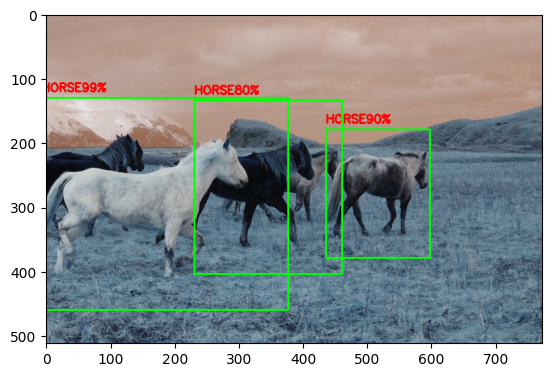

In [4]:
# Single image obeject detection
whT = 320
conf_threshold = 0.5
nms_threshold = 0.3

img = cv2.imread('assets/horses.jpg')

blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (whT, whT), swapRB=True, crop=False)
net.setInput(blob)

layernames = net.getLayerNames()

# outputnames = [(layernames[i[0] - 1]) for i in net.getUnconnectedOutLayers()]
outputnames = [(layernames[i - 1]) for i in net.getUnconnectedOutLayers()]
# print(outputnames)
outputs = net.forward(outputnames)
# print(outputs)
find_objects(outputs, img)

plt.imshow(img)


In [5]:
# online object detection

whT = 320
conf_threshold = 0.5
nms_threshold = 0.3

# online video
cap = cv2.VideoCapture(4)
# cap = cv2.VideoCapture(cv2.CAP_V4L2)

# offline demo video
# cap = cv2.VideoCapture('assets/demo_out.mp4')

while True:

    ret, img = cap.read()

    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (whT, whT), swapRB=True, crop=False)
    net.setInput(blob)

    layernames = net.getLayerNames()
    # on = [(ln[i[0] - 1]) for i in net.getUnconnectedOutLayers()]
    outputnames = [(layernames[i - 1]) for i in net.getUnconnectedOutLayers()]
    # print(outputnames)
    outputs = net.forward(outputnames)
    # print(outputs)
    find_objects(outputs, img)


    cv2.imshow('Video stream', img)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

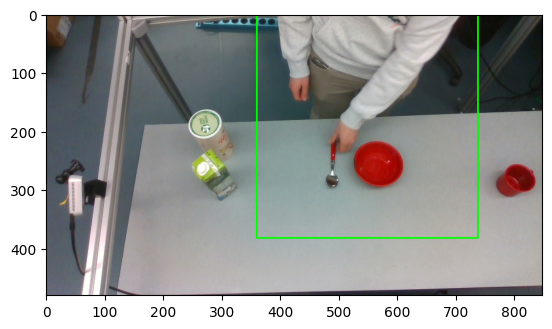

In [6]:
# Single image obeject detection using our custom data

whT = 320
conf_threshold = 0.5
nms_threshold = 0.3

img = cv2.imread('assets/custom_pic.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (whT, whT), swapRB=True, crop=False)
net.setInput(blob)

layernames = net.getLayerNames()
# on = [(ln[i[0] - 1]) for i in net.getUnconnectedOutLayers()]
outputnames = [(layernames[i - 1]) for i in net.getUnconnectedOutLayers()]
# print(outputnames)
outputs = net.forward(outputnames)
# print(outputs)
find_objects(outputs, img)

plt.imshow(img)

In [7]:
# set custom classes file
classesFile = 'assets/yolov3/custom_cfg/obj.names'
with open(classesFile,'rt') as f:
    className = f.read().rstrip('\n').split('\n')

# set custom model configuration
modelConfiguration = 'assets/yolov3/custom_cfg/yolov3_custom.cfg'

# set custom model weights
modelWeights = 'assets/yolov3/custom_cfg/yolov3_custom_last.weights'

# set YOLO-v3 network
net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

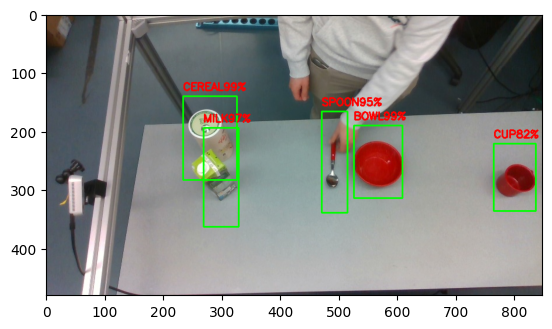

In [8]:
# Single image obeject detection using our custom data

whT = 320
conf_threshold = 0.5
nms_threshold = 0.3

img = cv2.imread('assets/custom_pic.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (whT, whT), swapRB=True, crop=False)
net.setInput(blob)

layernames = net.getLayerNames()
# on = [(ln[i[0] - 1]) for i in net.getUnconnectedOutLayers()]
outputnames = [(layernames[i - 1]) for i in net.getUnconnectedOutLayers()]
# print(outputnames)
outputs = net.forward(outputnames)
# print(outputs)
find_objects(outputs, img)

plt.imshow(img)

## 1-2-2 YOLO-v3    Custom model training -  Darknet Installation


#### 1-2-2-1 Download Darknet repo
Now we start configuring the detector YOLO.
1st Step:
  Clone Darknet GitHub repository

In [18]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.17 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


#### 1-2-2-2 Depedencies installation
Install gcc and g++ to make sure YOLO can run afterwards if necessary. Execute them in the terminal.

In [20]:
# !apt install gcc-5 g++-5 -y
# !ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
# !ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

To get the working Directory, we need to run the following code. They also installed the necessary libaries for us to run YOLO.

In [19]:
# !apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

········


[sudo] password for yuankai: 



Reading package lists...
Building dependency tree...
Reading state information...
libgstreamer1.0-dev is already the newest version (1.16.2-2).
libjpeg-dev is already the newest version (8c-2ubuntu8).
libmp3lame-dev is already the newest version (3.100-3).
libtheora-dev is already the newest version (1.1.1+dfsg.1-15ubuntu2).
libv4l-dev is already the newest version (1.18.0-2build1).
libvorbis-dev is already the newest version (1.3.6-2ubuntu1).
python3-numpy is already the newest version (1:1.17.4-5ubuntu3).
unzip is already the newest version (6.0-25ubuntu1).
libdc1394-22 is already the newest version (2.2.5-2.1).
libdc1394-22-dev is already the newest version (2.2.5-2.1).
libopencore-amrnb-dev is already the newest version (0.1.5-1).
libopencore-amrwb-dev is already the newest version (0.1.5-1).
libopencv-dev is already the newest version (4.2.0+dfsg-5).
libtbb-dev is already the newest version (2020.1-2).
libxine2-dev is already the newest version (1.2.9-1build5).
libxvidcore-dev is 

0

#### 1-2-2-3 Make Darknet and enable GPU for it
Now we need to go into Darknet and enable the GPU. Then finish compiling the whole Darknet.

In [37]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/home/student/Downloads/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0)
      |             ^~
./src/image_opencv.cpp:1150

In file included from /usr/include/string.h:495,
                 from include/darknet.h:14,
                 from ./src/utils.h:3,
                 from ./src/utils.c:4:
In function ‘strncpy’,
    inlined from ‘copy_string’ at ./src/utils.c:531:5:
/usr/include/x86_64-linux-gnu/bits/string_fortified.h:106:10: warning: ‘__builtin_strncpy’ specified bound depends on the length of the source argument [-Wstringop-overflow=]
  106 |   return __builtin___strncpy_chk (__dest, __src, __len, __bos (__dest));
      |          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
./src/utils.c: In function ‘copy_string’:
./src/utils.c:531:22: note: length computed here
  531 |     strncpy(copy, s, strlen(s)+1);
      |                      ^~~~~~~~~
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU 

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
./src/convolutional_layer.c: In function ‘forward_convolutional_layer’:
./src/convolutional_layer.c:1342:32: warning: unused variable ‘t_intput_size’ [-Wunused-variable]
 1342 |                         size_t t_intput_size = binary_transpose_align_input(k, n, state.workspace, &l.t_bit_input, ldb_align, l.bit_align);
      |                                ^~~~~~~~~~~~~
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-con

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/crop_layer.c -o obj/crop_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/dropout_layer.c -o obj/dropout_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/maxpool_layer.c -o obj/maxpool_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/loc

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/matrix.c -o obj/matrix.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/network.c -o obj/network.o
./src/network.c: In function ‘train_network_waitkey’:
./src/network.c:435:13: warning: unused variable ‘ema_period’ [-Wunused-variable]
  435 |         int ema_period = (net.max_batches - ema_start_point - 1000) * (1.0 - net.ema_alpha);
      |             ^~~~~~~~~~
./src/network.c: In function ‘resize_network’:
./src/network.c:660:42: warning: passing argument 1 of ‘cudaHostAlloc’ from incompatible pointer type [-Wincompatible-pointer-types

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/nightmare.c -o obj/nightmare.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/normalization_layer.c -o obj/normalization_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/avgpool_layer.c -o obj/avgpool_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU 

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/shortcut_layer.c -o obj/shortcut_layer.o
./src/shortcut_layer.c: In function ‘make_shortcut_layer’:
./src/shortcut_layer.c:55:15: warning: unused variable ‘scale’ [-Wunused-variable]
   55 |         float scale = sqrt(2. / l.nweights);
      |               ^~~~~
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/representation_layer.c -o obj/representation_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-un

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/gaussian_yolo_layer.c -o obj/gaussian_yolo_layer.o
./src/gaussian_yolo_layer.c: In function ‘make_gaussian_yolo_layer’:
./src/gaussian_yolo_layer.c:72:38: warning: passing argument 1 of ‘cudaHostAlloc’ from incompatible pointer type [-Wincompatible-pointer-types]
   72 |     if (cudaSuccess == cudaHostAlloc(&l.output, batch*l.outputs * sizeof(float), cudaHostRegisterMapped)) l.output_pinned = 1;
      |                                      ^~~~~~~~~
      |                                      |
      |                                      float **
In file included from /usr/include/cuda_runtime.h:96,
                 from include/darknet.h:41,
                 from ./src/gaussian_yolo_layer.h:5,
                 from ./src/gaussian_yolo_l

Make darknet executable, and download yolov3 pretrained weights

In [38]:
!chmod a+x ./darknet

# You can also download yolov3 and yolov4 weights if you need them. We provide yolov3 pretrained weights in 'assets' folder
# !wget https://pjreddie.com/media/files/yolov3.weights
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

chmod: cannot access './darknet': No such file or directory


In [36]:
# check the current path
!pwd

/home/student/Downloads


Now we can choose a picture that you want to do object detection in the path **"data/xx.jpg"**. And the result will be saved as predictions.jpg

In [30]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg ../yolov3.weights -ext_output data/person.jpg

/bin/bash: ./darknet: Is a directory


- **If you got the output picture, congratulations! Darknet has been successfully installed.**
- And now we ned to use Darknet for custom training!

Firstly, you need to export your annotation from **CVAT**. The link: https://cvat.org/

- Make sure your export data as YOLO form. 
- ### An example folder has been putted in the 'assets' folder.

## 1-2-2 YOLO-v3    Custom model training - Training Configuration


To finish the custom model training, you need to build a **"custom_data"** folder and put your annotated dataset (from **CVAT**) in the "custom_data" folder. Do not forget to change the corresponding path inside of 'obj.data' and 'train.txt'

Copy the pretraned weights **darknet53.conv.74** to the cutom_train folder.

    
Create file **yolov3_custom.cfg** with the same content as in **yolov3.cfg** and:
    
    1. Change line batch to batch=64
    2. Change line subdivisions to subdivisions=16 (Could be out of memory, try 32 or 64 then)
    3. Change line max_batches to (classes*2000, but not less than number of training images and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
    4. Change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
    5. Set network size width=416 height=416 or any value multiple of 32: 
         width=416 
         height=416
    6. Change [filters=255] to filters=(classes + 5)x3 in the 3 [convolutional] before each [yolo] layer, keep in mind that it only has to be the last [convolutional] before each of the [yolo] layers. And you also need to change the classes in [yolo] to the class number you have.
    7. Use the commend line below:
    !./darknet detector train custom_data/obj.data custom_data/yolov3_custom.cfg custom_data/darknet53.conv.74 -dont_show
    
Reference: https://github.com/AlexeyAB/darknet 

### Loss of custom training

<figure style="text-alin:center">
<img src="assets/yolov3/custom_data/chart_yolov3_custom.png" width="480" height="320"/>
<figcaption >  </figcaption>
</figure>

In [20]:
# Use this code in notebook, if it takes too lone, try to run below code in terminal
# !./darknet detector train custom_data/obj.data custom_data/yolov3_custom.cfg custom_data/darknet53.conv.74

# Use this code in terminal
#./darknet detector train custom_data/obj.data custom_data/yolov3_custom.cfg custom_data/darknet53.conv.74

**After custom training, you can get retrained weights, config files. You can use them for your custom datasets.**

Darknet also provide **yolov4**, you can test it with the code below:

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -thresh 0.25 

 CUDA-version: 11010 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 B

In the next, we will introduce Mask RCNN.

# 2-1 Mask R-CNN for instance segmentation

# 2-1-1 What is Mask R-CNN

Mask R-CNN is a state-of-the-art deep learning model for instance segmentation. It is built on top of Faster R-CNN and a region-based convolutional neural network.   Instead of predicting the bounding boxes of objects in an image or frame, Mask R-CNN predicts the semantic labels for every pixel of the image or frame.

Source: Faster R-CNN https://arxiv.org/pdf/1506.01497.pdf

**What is the different between semantic segmentation and instance segmentation?**

Unlike the image segmentation method, Mask R-CNN is an instance segmentation method. It can predict not only the category for each pixel, but also their object instances.


<figure style="text-alin:center">
<img src="assets/image_segmentation_instance.PNG" width="640" height="480"/>
<figcaption >  </figcaption>
</figure>

Source: V. Varatharasan, H. Shin, A. Tsourdos and N. Colosimo, "Improving Learning Effectiveness For Object Detection and Classification in Cluttered Backgrounds," 2019 Workshop on Research, Education and Development of Unmanned Aerial Systems (RED UAS), 2019, pp. 78-85, doi: 10.1109/REDUAS47371.2019.8999695.





**What is R-CNN?**

R-CNN first takes an RGB image as input and generates around 2000 bottom-up region proposals. These regions roughly describe the locations of the objects. Afterward, a convolutional neural network is used to compute features for each proposal. Finally, a class-specific linear SVMs is used for classifying each region.

<figure style="text-alin:center">
<img src="assets/rcnn.PNG" width="640" height="480"/>
<figcaption >  </figcaption>
</figure>


Source: R. Girshick, J. Donahue, T. Darrell and J. Malik, "Rich Feature Hierarchies for Accurate Object Detection and Semantic Segmentation," 2014 IEEE Conference on Computer Vision and Pattern Recognition, 2014, pp. 580-587, doi: 10.1109/CVPR.2014.81.


**How Mask R-CNN works?**

Mask R-CNN is built on top of Faster R-CNN. It has 2 stages. Similar to R-CNN, the first stage uses a region proposal network to extract the region of interesting, Then in the second stage, Mask R-CNN is using two-branch to predict the outputs. Its output including bounding box, class label and an object mask. The bounding box and class label are similar to YOLO, the additional object mask shows the region of interest in pixel level.


<figure style="text-alin:center">
<img src="assets/mask_rcnn_1.PNG" width="640" height="480"/>
<figcaption >  </figcaption>
</figure>

Source: He, Kaiming, et al. "Mask r-cnn." Proceedings of the IEEE international conference on computer vision. 2017.



## 2-1-2 Detectron2 for Mask R-CNN

In [10]:
# Install detectron2 dependencies

!pip install torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install git+https://github.com/facebookresearch/fvcore.git

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-asw6a792
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-asw6a792
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65381 sha256=700350e6dd28e919412ba346a6f327848ff684dee58397ce2b959692d7199a4e
  Stored in directory: /tmp/pip-ephem-wheel-cache-fydou5ez/wheels/1c/a9/3c/ff2edce1a1295c72dfff759833097cb1d7713d2f09672d4dd1
Successfully built fvcore


In [12]:
# Download detectron2 from facebook research

!git clone https://github.com/facebookresearch/detectron2 detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 15022, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 15022 (delta 23), reused 35 (delta 17), pack-reused 14975
Receiving objects: 100% (15022/15022), 6.10 MiB | 20.48 MiB/s, done.
Resolving deltas: 100% (10888/10888), done.


In [13]:
# Install detectron2

!pip install --force-reinstall -e detectron2_repo
# !pip install detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install pycocotools

Obtaining file:///home/student/Downloads/detectron2_repo
/home/student/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/student/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
     |████████████████████████████████| 3.3 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 78.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
     |████████████████████████████████| 77 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 71.1 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 17.8 MB/s  eta 0:00:01
  U

     |████████████████████████████████| 151 kB 80.1 MB/s eta 0:00:01
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp38-cp38-linux_x86_64.whl size=423014 sha256=fcfc72c27a64bea789091baa85a8d5b96af0613f39622d7e23f6ad256b6bde90
  Stored in directory: /home/student/.cache/pip/wheels/3e/08/ac/58126fe59992032701437336493f6132e1b72381a62d00b595
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61405 sha256=5c9caf0358bb5e562db138328cbb6b0e1010f4d844af696fe9a79f7058b3ac2a
  Stored in directory: /home/student/.cache/pip/wheels/b8/79/07/c0e9367f5b5ea325e246bd73651e8af175fabbef943043b1cc
Successfully built pycocotools fvcore
ERROR: launchpadlib 1.10.13 requires testresources, which is not installed.
ERROR: virtualenv 20.16.6 has requirement platformdirs<3,>=2.4, but you'll have platformdirs 3.5.0 which is incompatible.
ERROR: davisinteractive 1.0.4 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 1.1.3 which is incompatible.
ERROR

  Attempting uninstall: markdown
    Found existing installation: Markdown 3.4.1
    Uninstalling Markdown-3.4.1:
      Successfully uninstalled Markdown-3.4.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: tensorboard-plugin-wit
    Found existing installation: tensorboard-plugin-wit 1.8.1
    Uninstalling tensorboard-plugin-wit-1.8.1:
      Successf

  Created wheel for detectron2: filename=detectron2-0.6-cp38-cp38-linux_x86_64.whl size=6203444 sha256=ed7299cd5f231a96d80389af397e82b67297b2a131e88f4c5c8942b99dbda11d
  Stored in directory: /tmp/pip-ephem-wheel-cache-qagnp72j/wheels/19/ac/65/e48e5e4ec2702274d927c5a6efb75709b24014371d3bb778f2
Successfully built detectron2


In [14]:
!pwd
!pip install detectron2

/home/student/Downloads


In [1]:
from functools import partial
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import torch, torchvision
# torch.__version__
import numpy as np
import cv2
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode
import pycocotools.mask as coco_mask
from detectron2.config import get_cfg
import os

In [2]:
# Set expected object classes
OBJ_CLASSES = {
    0: '00_person',
    1: '01_checkerboard',
    2: '02_spoon',
    3: '03_milk',
    4: '04_bowl',
    5: '05_oats',

}

INV_OBJ_CATEGORIES = {v: k for k,v in OBJ_CLASSES.items()}
print(INV_OBJ_CATEGORIES)

{'00_person': 0, '01_checkerboard': 1, '02_spoon': 2, '03_milk': 3, '04_bowl': 4, '05_oats': 5}


In [3]:
# Create object masks

def create_sub_masks(mask_image, width, height):
    # Initialize a dictionary of sub-masks indexed by RGB colors
    sub_masks = {}

    # 'r': 1.0, 'g': 0.9215686321258545, 'b': 0.01568627543747425, 'a': 1.0

    # sub_masks[1] = mask_image[:,:,1.0, 0.9215686321258545, 0.01568627543747425]
    # sub_masks[1] = mask_image[:,:]
    img1 = np.zeros((width, height), dtype=np.uint8)
    img2 = np.zeros((width, height), dtype=np.uint8)
    img3 = np.zeros((width, height), dtype=np.uint8)
    img4 = np.zeros((width, height), dtype=np.uint8)
    img5 = np.zeros((width, height), dtype=np.uint8)
    img6 = np.zeros((width, height), dtype=np.uint8)

    for x in range(width):
        for y in range(height):
            pixel = mask_image[x, y]
            if pixel[2] == 0 and pixel[1] == (int)(128) and pixel[0] == (int)(128):
                img1[x, y] = 255
            elif pixel[2] == (int)(128) and pixel[1] == (int)(0) and pixel[0] == (int)(0):
                img2[x, y] = 255
            elif pixel[2] == (int)(128) and pixel[1] == (int)(128) and pixel[0] == (int)(0):
                img3[x, y] = 255
            elif pixel[2] == (int)(0) and pixel[1] == (int)(128) and pixel[0] == (int)(0):
                img4[x, y] = 255
            elif pixel[2] == (int)(0) and pixel[1] == (int)(0) and pixel[0] == (int)(128):
                img5[x, y] = 255
            elif pixel[2] == (int)(128) and pixel[1] == (int)(0) and pixel[0] == (int)(128):
                img6[x, y] = 255
            # print(pixel)

    sub_masks[0] = img1  # person
    sub_masks[1] = img2  # chekerboard
    sub_masks[2] = img3  # spoon
    sub_masks[3] = img4  # milk
    sub_masks[4] = img5  # bowl
    sub_masks[5] = img6  # oats
    return sub_masks

In [4]:
# dex-ycb hand segmentation function

def dexycb_hand_seg_func_mivos(num_samples=-1, ignore_background=False, dir='assets/mask_rcnn/content/mivos', step_size=50):
    data_dir = dir
    subjects = [f for f in os.listdir(data_dir) if 'subject' in f]
    print(subjects)
    lst = []

    prefix = f"{data_dir}"
    length = num_samples
    print(length)
    for i in range(0, length, 1):
        color_file = f"{prefix}/images/color%04d.jpg" % (i * step_size)
        seg_mask = f"{prefix}/mask/%05d.png" % i
        print(color_file)
        print(seg_mask)

        assert os.path.exists(color_file)
        assert os.path.exists(seg_mask)
        seg_img = cv2.imread(seg_mask)
        height, width, channels = seg_img.shape

        a = create_sub_masks(seg_img, height, width)
        annotations = []

        for j in range(len(a)):
            rel_mask = coco_mask.encode(np.asfortranarray(a[j]))
            rows, cols = np.where(a[j])
            category_label, category_id = get_category2(j)
            print(rows.any())

            if rows.any():
                print("Entered Annotator")
                annotation = {
                    'bbox': [min(cols), min(rows), max(cols), max(rows)],
                    'bbox_mode': BoxMode.XYXY_ABS,
                    'category_id': category_id,
                    'segmentation': rel_mask
                }

                print(annotation)

                annotations.append(annotation)

        dct = {
            'file_name': color_file,
            'height': height,
            'width': width,
            'image_id': i,
            'annotations': annotations,
        }

        lst.append(dct)
        if len(lst) == length:
            return lst


In [5]:
# Get object class

def get_category2(id):
    
    k = OBJ_CLASSES[id]

    return k, INV_OBJ_CATEGORIES[k]

In [6]:
# Build Detectron2Wrapper



class Detectron2Wrapper:

    def __init__(self, cfg_path="assets/mask_rcnn/cfg_mivos.yaml"):
        
        cfg2 = get_cfg()
        cfg2.merge_from_file(cfg_path)
        # value is the threshold used to filter out low-scored bounding boxes predicted by the 
        # Fast R-CNN component of the model during inference/test time.
        cfg2.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6  # set the testing threshold for this model
        cfg2.DATASETS.TEST = ("Mivos",)
        self.predictor = DefaultPredictor(cfg2)
        self.gen_meta()
        # self.predictor = predictor

    def gen_meta(self):
        DatasetCatalog.register("Mivos", partial(dexycb_hand_seg_func_mivos,
                                                        num_samples=2,
                                                        ignore_background=True,
                                                        dir='assets/mask_rcnn/content/mivos',
                                                        step_size=50))
        dataset = DatasetCatalog.get("Mivos")
        self.meta = MetadataCatalog.get("Mivos")
        num_categories = len(OBJ_CLASSES)
        self.meta.num_categories = num_categories
        self.meta.thing_classes = [OBJ_CLASSES[i] for i in range(num_categories)]

    def process(self, img_bgr):
        outputs = self.predictor(img_bgr)
        mask = outputs["instances"].get("pred_masks").to("cpu")
        classes = outputs["instances"].get("pred_classes").to("cpu")
        mask = mask.numpy()
        classes = classes.numpy()
        return mask, classes

In [7]:
# Initialize Detectron2Wrapper as 'det'

from matplotlib import pyplot as plt


det = Detectron2Wrapper()

# img_bgr = cv2.imread("bag_1/camera_135122071615/color%04d.jpg"%j)


[05/02 19:00:38 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from assets/mask_rcnn/pretrained/model_final.pth ...
[]
2
assets/mask_rcnn/content/mivos/images/color0000.jpg
assets/mask_rcnn/content/mivos/mask/00000.png
True
Entered Annotator
{'bbox': [397, 0, 741, 182], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'segmentation': {'size': [480, 848], 'counts': b'kSj56V>n0_Of0Ae0[O8H4L4L3M2N2N2N2N2N5K9G4L3M3M3M3M3M2N2N2N2N1O2N1O1O1O1O1O1O1O001O1O001O00001O001O3UFRK^9Z5N1O1O1O001O00000000000000000000000000000000000000000000000000000000O1000000000000O10000000000O1000000O100O1O1O100N2N2O1O1001O2N2N000000001O1O00001O000000001O000000000000O1000000000000000000O1000000000000O1000000O100O100O100O1O100O100O100O100O10000O10000O1000000O10000O1000000O1000000O1000000O100O100O10000O100O100O100O1O100O100O1O1O100N2O10000001cEfKR:f4N1O1O1O001O00cNUF`LOo0k9[2fFbMZ9Z2iFhMV9U2lFlMT9Q2oFoMQ9o1QGQNo8l1RGVNn8g1RG\\Nn8a1TG`Nl8^1UGcNk8\\1TGfNl8X1UGiNk8U1UGlNl8S1TGnNl8Q1TGoNm8o0TGQ

In [8]:
!pwd
!ls assets/mask_rcnn/pretrained/model_final.pth

/home/student/Downloads
assets/mask_rcnn/pretrained/model_final.pth


/home/student/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


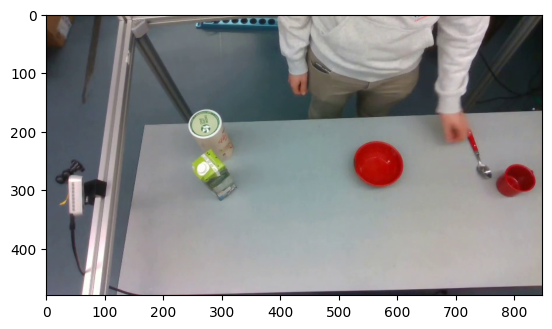

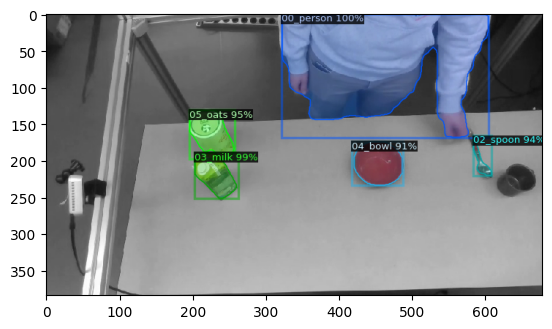

In [9]:
# Imread image and process single image using detectron2

from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

j = 100
img_bgr = cv2.imread("assets/mask_rcnn/test_images/frame_%06d.PNG"%j)
# img_bgr = cv2.imread("assets/mask_rcnn/content/mivos/images/color0600.jpg")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
result = det.predictor(img_rgb)


# print(result)

v = Visualizer(img_rgb[:, :, ::-1],
                   metadata=det.meta, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )


v = v.draw_instance_predictions(result["instances"].to("cpu"))

plt.figure()

plt.imshow(v.get_image()[:, :, ::-1])


In [10]:
# if error happened, check the version of your torch and torchvision.
print(torch.__version__)
print(torchvision.__version__)

1.10.0+cu111
0.11.1+cu111


In [10]:
# Use Detectron2 for Video input, we ues the demo video which you can find in the 'assets' folder
import cv2

cap = cv2.VideoCapture('assets/demo_out.mp4')
# cap = cv2.VideoCapture(0)

while True:
    
    ret, img = cap.read()
    
    
    result = det.predictor(img)
    
    # v = Visualizer(img, 
    v = Visualizer(img[:, :, ::-1],              
                   metadata=det.meta, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    
    v = v.draw_instance_predictions(result["instances"].to("cpu"))
    
    # cv2.imshow('Video stream', v.get_image()[:, :, ::-1])
    cv2.imshow('Video stream', v.get_image())
    
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()


## 2-1-3  Detectron2 custom training for Mask R-CNN using annotation from MiVOS








###  Now, let's fine-tune a coco-pretrained R50-FPN Mask R-CNN model on you custom dataset.


In [12]:
!pwd

/home/student/Downloads


In [11]:
# Configure the Trainer for Detectron2

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("Mivos",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.DEVICE= 'cuda:0'   #for GPU, otherwise 'cpu'


In [12]:
# Initialize the model weights

cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl" 

In [13]:
# Initialize meta and set num of classes for Mask R-CNN output

OBJ_CLASSES = {
    0: '00_person',
    1: '01_checkerboard',
    2: '02_spoon',
    3: '03_milk',
    4: '04_bowl',
    5: '05_oats',

}
num_categories = len(OBJ_CLASSES)

meta = MetadataCatalog.get("Mivos")

meta.num_categories = num_categories

meta.thing_classes = [OBJ_CLASSES[i] for i in range(num_categories)]

# print(dataset)

# cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_categories

In [14]:
# Initializ Trainer
# If you run the code, maybe you get warning because of the last layer demension is different from loading weights

cfg.MODEL.DEVICE= 'cuda:0'
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300 # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_categories
cfg.INPUT.MASK_FORMAT = 'bitmask'
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)


[05/02 19:01:08 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[]
2
assets/mask_rcnn/content/mivos/images/color0000.jpg
assets/mask_rcnn/content/mivos/mask/00000.png
True
Entered Annotator
{'bbox': [397, 0, 741, 182], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'segmentation': {'size': [480, 848], 'counts': b'kSj56V>n0_Of0Ae0[O8H4L4L3M2N2N2N2N2N5K9G4L3M3M3M3M3M2N2N2N2N1O2N1O1O1O1O1O1O1O001O1O001O00001O001O3UFRK^9Z5N1O1O1O001O00000000000000000000000000000000000000000000000000000000O1000000000000O10000000000O1000000O100O1O1O100N2N2O1O1001O2N2N000000001O1O00001O000000001O000000000000O1000000000000000000O1000000000000O1000000O100O100O100O1O100O100O100O100O10000O10000O1000000O10000O1000000O1000000O1000000O100O100O10000O100O100O100O1O100O100O1O1O100N2O10000001cEfKR:f4N1O1O1O001O00cNUF`LOo0k9[2fFbMZ9Z2iFhMV9U2lFlMT9Q2oFoMQ9o1QGQNo8l1RGVNn8g1RG\\Nn8a1TG`Nl8^1UGcNk8\\1TGfNl8X1UGiNk8U1UGlNl8S1TGnNl8Q1TGoNm8o0TGQOm8m0SGTOn8k0RGVOn8i0QGXOP9g0oFZOR9e0bFG_97`FL`94]FNd92XF2h9MWF4j9KUF6l9LoE6R:\\20O1O100O1N2O1O1N2O1N2O1N2O1O1O1O1N2O1N2N2N2N2O1O1O1O1O1O1

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (7, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (7,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (24, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (24,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (6, 256, 1, 1) 

In [17]:
pip install setuptools==59.5.0

     |████████████████████████████████| 952 kB 5.4 MB/s eta 0:00:01
ERROR: launchpadlib 1.10.13 requires testresources, which is not installed.
ERROR: jupyter-packaging 0.12.3 has requirement setuptools>=60.2.0, but you'll have setuptools 59.5.0 which is incompatible.
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Start Custom training for Mask R-CNN
trainer.train()

[05/02 19:01:29 d2.engine.train_loop]: Starting training from iteration 0


/home/student/Downloads/detectron2_repo/detectron2/data/detection_utils.py:446: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  torch.stack([torch.from_numpy(np.ascontiguousarray(x)) for x in masks])
/home/student/Downloads/detectron2_repo/detectron2/data/detection_utils.py:446: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This 

[05/02 19:01:36 d2.utils.events]:  eta: 0:01:36  iter: 19  total_loss: 2.477  loss_cls: 0.9189  loss_box_reg: 0.947  loss_mask: 0.6156  loss_rpn_cls: 0.004607  loss_rpn_loc: 0.0142    time: 0.3369  last_time: 0.3402  data_time: 0.0088  last_data_time: 0.0030   lr: 0.0012854  max_mem: 2610M
[05/02 19:01:42 d2.utils.events]:  eta: 0:01:29  iter: 39  total_loss: 1.413  loss_cls: 0.4107  loss_box_reg: 0.7608  loss_mask: 0.1923  loss_rpn_cls: 0.0007277  loss_rpn_loc: 0.0105    time: 0.3378  last_time: 0.3468  data_time: 0.0030  last_data_time: 0.0033   lr: 0.0026174  max_mem: 2610M
[05/02 19:01:49 d2.utils.events]:  eta: 0:01:23  iter: 59  total_loss: 0.5834  loss_cls: 0.1187  loss_box_reg: 0.4106  loss_mask: 0.05761  loss_rpn_cls: 0.0004031  loss_rpn_loc: 0.01136    time: 0.3412  last_time: 0.3446  data_time: 0.0030  last_data_time: 0.0030   lr: 0.0039494  max_mem: 2610M
[05/02 19:01:56 d2.utils.events]:  eta: 0:01:16  iter: 79  total_loss: 0.4065  loss_cls: 0.0888  loss_box_reg: 0.2694  l

**Now you can use the fine-tuned weights for Mask R-CNN inference**  

# Homework


- Task 1 YOLO 2 Students
- Task 2 Mask R-CNN 2 Students

## Task 1 (2 Students):
### 1.1 Fine-tune YOLOv3 using your custom dataset.
Tips: 
- Do not need to use all of the images from video. You can sample images with different scenarios.

### 1.2 Apply forground background segmentation using K-means (color, x-y-z (3D position of pointcoulds)) after processing one image from yolov3.

Tips: 
- You can use K-Means from sklearn.cluster. And consider you have object and background in a bounding box.
- For x-y-z, you can use the reconstruction method from Tutorial 1.

- Yolov3 weights after retrain

<figure style="text-alin:center">
<img src="assets/solutions/retrain_yolov3.png".png" />
<figcaption >  </figcaption>
</figure>

- Extract one of the objects
<figure style="text-alin:center">
<img src="assets/solutions/yolov3_1object.png".png" />
<figcaption >  </figcaption>
</figure>

- After kmeans
<figure style="text-alin:center">
<img src="assets/solutions/after_kmeans.png".png" />
<figcaption >  </figcaption>
</figure>

- XYZ using depth image
<figure style="text-alin:center">
<img src="assets/solutions/depth_image.png" />
<figcaption >  </figcaption>
</figure>

- 1 object using depth image
<figure style="text-alin:center">
<img src="assets/solutions/depth_1object.png" />
<figcaption >  </figcaption>
</figure>

- XZY + kmeans
<figure style="text-alin:center">
<img src="assets/solutions/xyz_kmeans.png" />
<figcaption >  </figcaption>
</figure>

In [ ]:
from sklearn.cluster import KMeans



### 1.3 Convert the clustering results into a segmentation image.

Tips: 
- You can use the overlay function below:

In [17]:
# First we need a overlay function to overlay the mask
from scipy.ndimage import binary_dilation

def overlay_function(image, mask, alpha=0.5):
    '''
    image: input rgb image
    mask:  an image with same dimension as image, but class label in pixel-level 
    '''
    
    color_map = [
        [0, 0, 0],
        [255, 255, 50],
        [255, 50, 50],
        [50, 255, 50],
        [50, 50, 255],
        [255, 50, 255],
        [50, 255, 255]
        
    ]

    color_map_np = np.array(color_map)

    """ Overlay segmentation on top of RGB image """
    im_overlay = image.copy()

    colored_mask = color_map_np[mask]
    foreground = image * alpha + (1 - alpha) * colored_mask
    binary_mask = (mask > 0)
    # Compose image
    im_overlay[binary_mask] = foreground[binary_mask]
    countours = binary_dilation(binary_mask) ^ binary_mask
    im_overlay[countours, :] = 0
    return im_overlay.astype(image.dtype)

- Color + kmeans
<figure style="text-alin:center">
<img src="assets/solutions/yolov3_overwriting.png"" />
<figcaption >  </figcaption>
</figure>

## Task 2 Mask R-CNN (2 Students):
### 2.1 Fine-tune Mask R-CNN using Detectron2.
- Use detectron2 to process the same image and generate the semantic pointcloud.

### 2.2 Compare both segmentation results with ground truth from MiVOS (pixel-wise acc).

- Original image + inference of mask_rcnn
<figure style="text-alin:center">
<img src="assets/solutions/image_inference.png" />
<figcaption >  </figcaption>
</figure>

- Inference mask
<figure style="text-alin:center">
<img src="assets/solutions/inference_mask.png" />
<figcaption >  </figcaption>
</figure>

- GT mask
<figure style="text-alin:center">
<img src="assets/solutions/gt_mask.png" />
<figcaption >  </figcaption>
</figure>

- Pixel-wise acc.
<figure style="text-alin:center">
<img src="assets/solutions/acc_caculation.png" />
<figcaption >  </figcaption>
</figure>

### 2.3 Try different smoothing functions on depth and check the result visually.

Tips: 
- Realsense default filter
- You can use different blurring filter in Opencv. # Gaussian Blurring, Median Blurring, Bilateral Filtering

- Depth image after average_blurring
<figure style="text-alin:center">
<img src="assets/solutions/depth_average_blurring.png".png" />
<figcaption >  </figcaption>
</figure>